In [1]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = ".\HAR\Combined"

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=




Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#import tsfel

Data formation 
1) Raw acceleration (acc_x, acc_y, acc_z)
2) Linear acceleration (acc_x^^2 + acc_y^^2 + acc_z^^2)
3) PCA on linear acceleration
4) PCA on TSFEL
5) PCA on features provided by the dataset


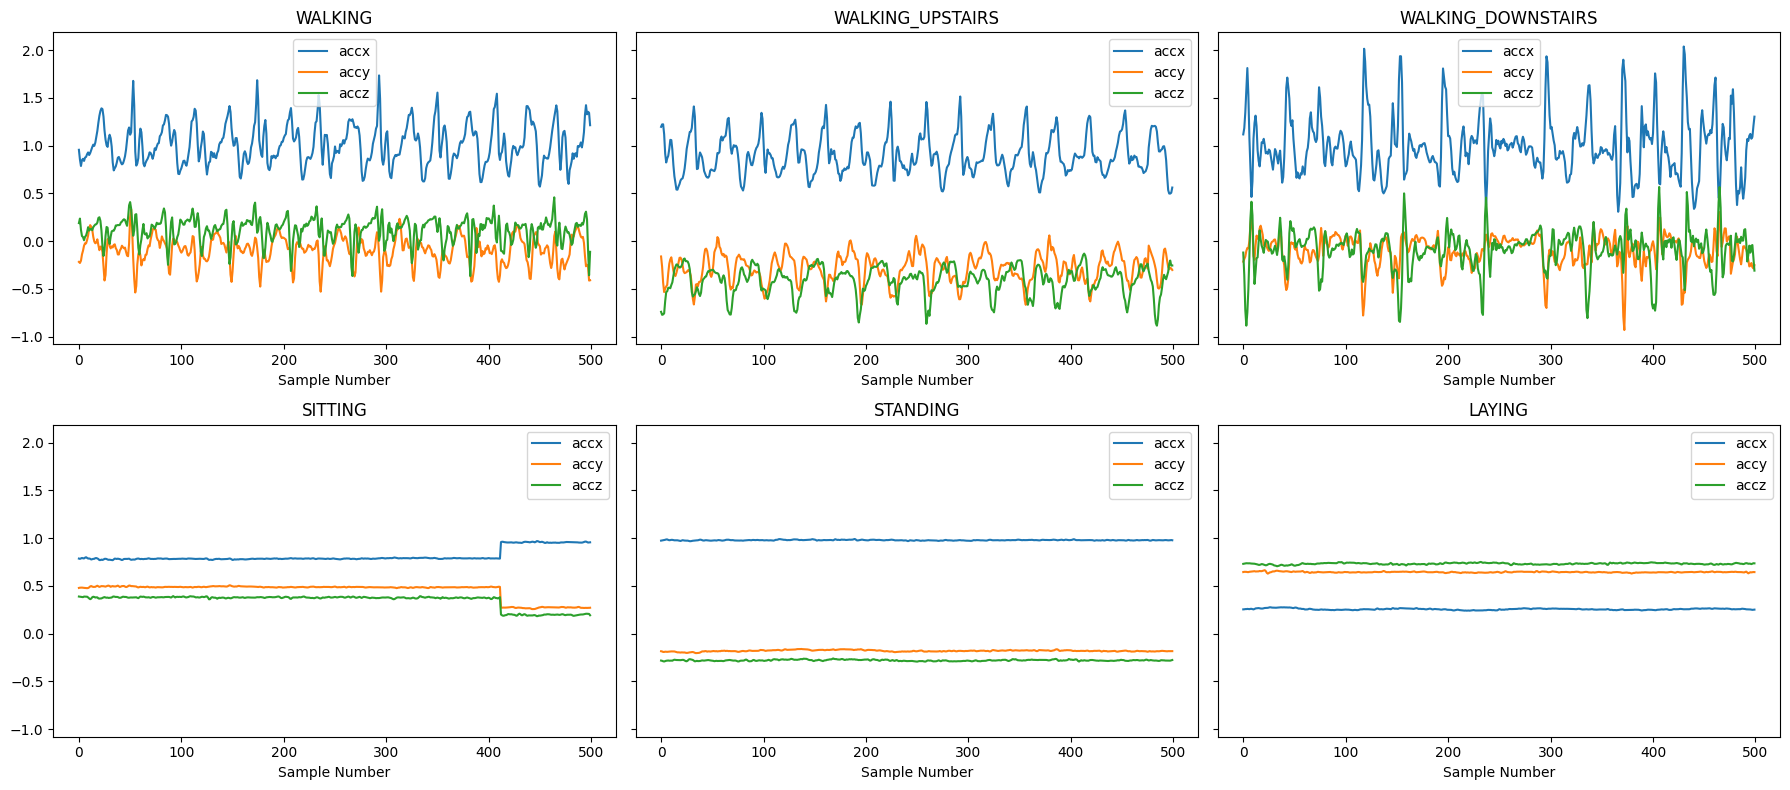

In [3]:
import matplotlib.pyplot as plt

samples = {}

for label in range(1, 7):  
    idx = np.where(y_train == label)[0][0]
    samples[list(classes.keys())[label - 1]] = X_train[idx]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8), sharey=True)

axes = axes.flatten()

for i, (activity, data) in enumerate(samples.items()):
    axes[i].plot(data[:, 0], label='accx')
    axes[i].plot(data[:, 1], label='accy')
    axes[i].plot(data[:, 2], label='accz')
    axes[i].set_title(activity)
    axes[i].set_xlabel('Sample Number')
    axes[i].legend()

plt.tight_layout()
plt.show()


In [4]:
path = "./HAR/Combined/Train"
activities = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]

all_data = []
all_labels = []
raw_acc = {} #One sample
linear_acc = {activity: [] for activity in activities}

for activity in activities:
    activity_path = os.path.join(path, activity)
    
    subjects = [f for f in os.listdir(activity_path) if f.endswith('.csv')]
    
    for subject in subjects:
        
        file_path = os.path.join(activity_path, subject)
        df = pd.read_csv(file_path)
        x = df['accx'][:500]
        y = df['accy'][:500]
        z = df['accz'][:500]
        
        if(subject[0]):
            acc = np.vstack((x, y, z)).T
        
        acc_2 = x**2 + y**2 + z**2  
        
        all_data.append(acc_2)
        all_labels.append(activity)
        
        raw_acc[activity] = acc    
        linear_acc[activity].append(acc_2)



### Waveform for one sample data from each activity

# Q2

### Linear acceleration for each activity

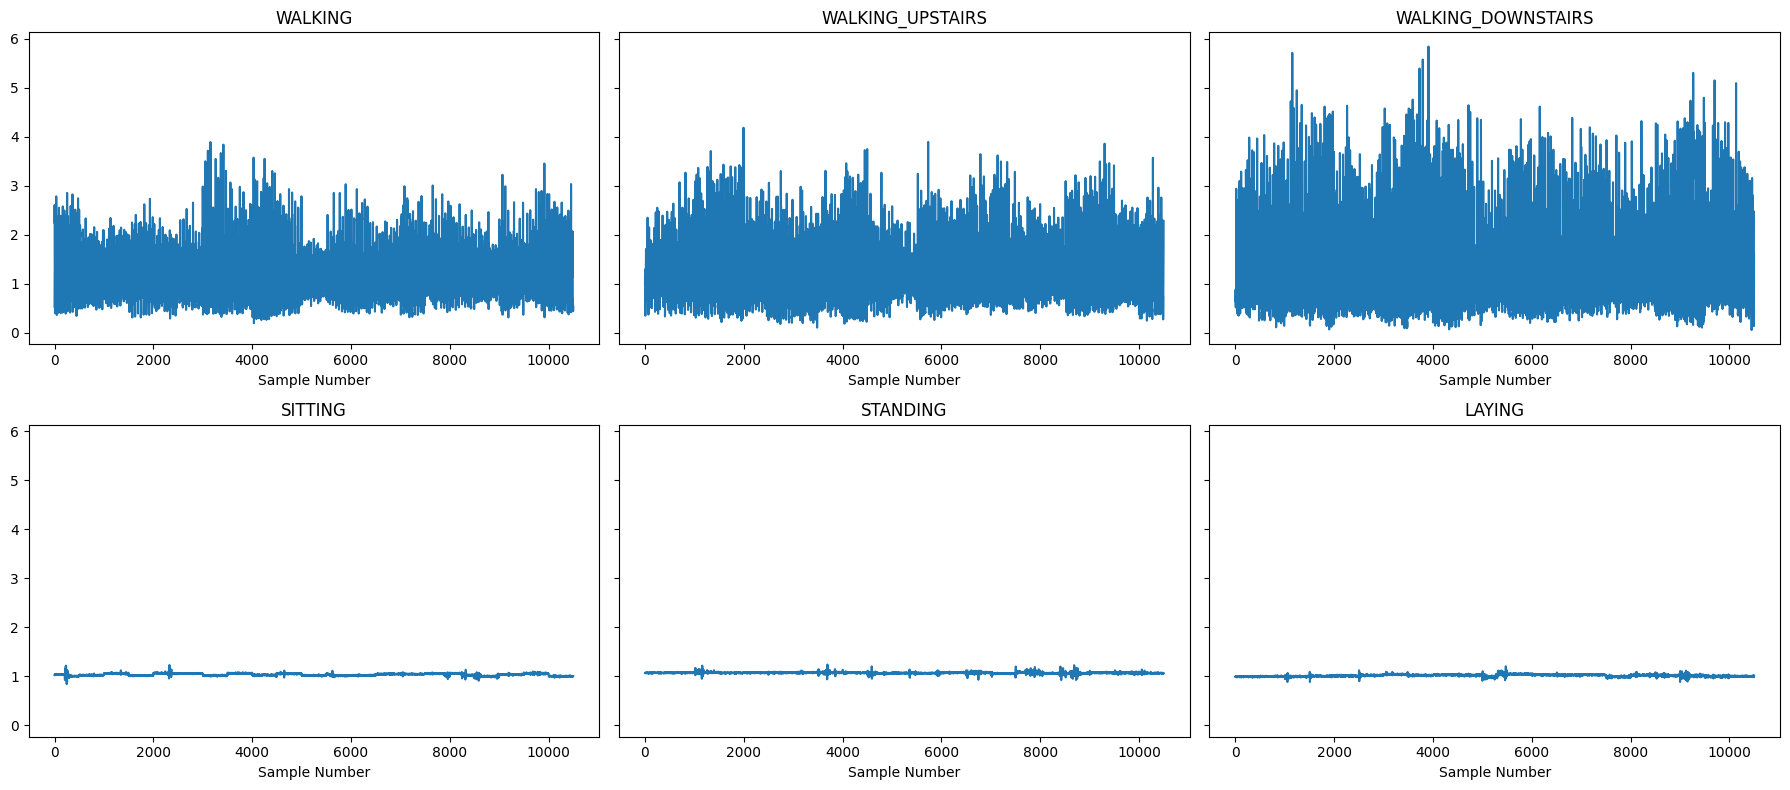

In [5]:
for activity in activities:
    linear_acc[activity] = np.concatenate(linear_acc[activity])

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8), sharey = True)

axes = axes.flatten()

for i, (activity, data) in enumerate(linear_acc.items()):
    axes[i].plot(data)
    axes[i].set_title(activity)
    axes[i].set_xlabel('Sample Number')
    
plt.tight_layout()
plt.show()

#### The plots of linear acceleration clearly illustrate a significant distinction between static and dynamic activities. Given this evident difference, a simple rule-based classifier could be sufficient, as the separation between dynamic and static activities is well-defined in the plots.

# Q3

### 3.1) PCA on total acceleration for first 500 samples

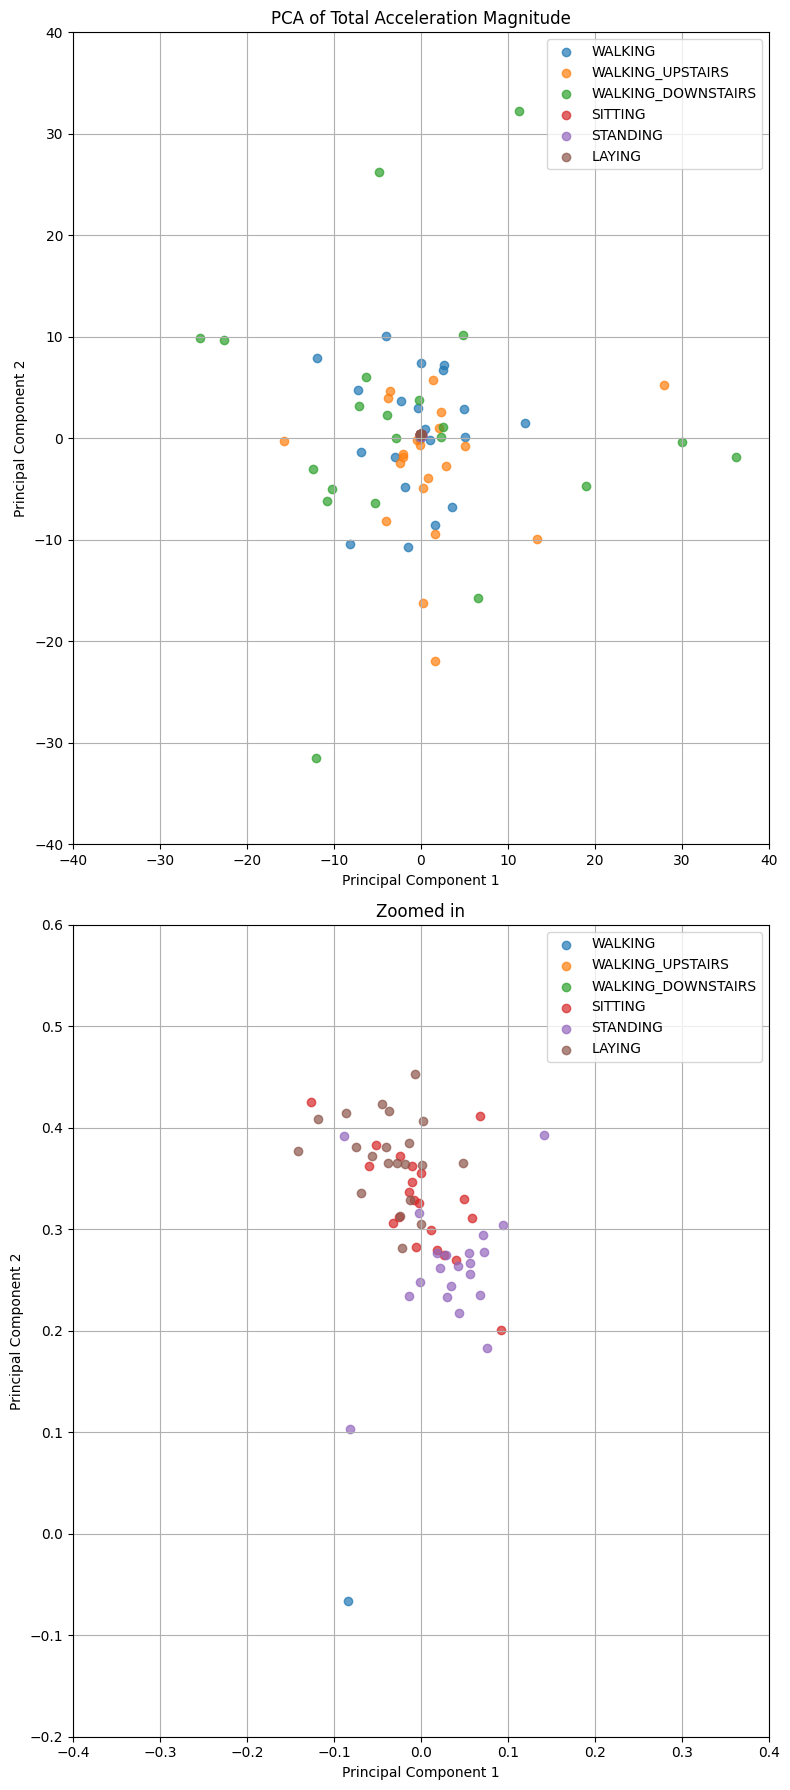

In [6]:
scaler = StandardScaler()
all_data_standardized = scaler.fit_transform(all_data)

pca = PCA(n_components=2)
pca_features = pca.fit_transform(all_data_standardized)

pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2'])
pca_df['Activity'] = all_labels
    
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 18))

axes[0].set_xlim(-40, 40)
axes[0].set_ylim(-40, 40)
axes[0].set_title('PCA of Total Acceleration Magnitude')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')

for activity in activities:
    subset = pca_df[pca_df['Activity'] == activity]
    axes[0].scatter(subset['PC1'], subset['PC2'], label=activity, alpha=0.7)

axes[0].legend()
axes[0].grid(True)

axes[1].set_xlim(-0.4, 0.4)
axes[1].set_ylim(-0.2, 0.6)
axes[1].set_title('Zoomed in')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')

for activity in activities:
    subset = pca_df[pca_df['Activity'] == activity]
    axes[1].scatter(subset['PC1'], subset['PC2'], label=activity, alpha=0.7)

axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

### 3.2)TSFEL 

### 3.3) PCA using the features given in the dataset

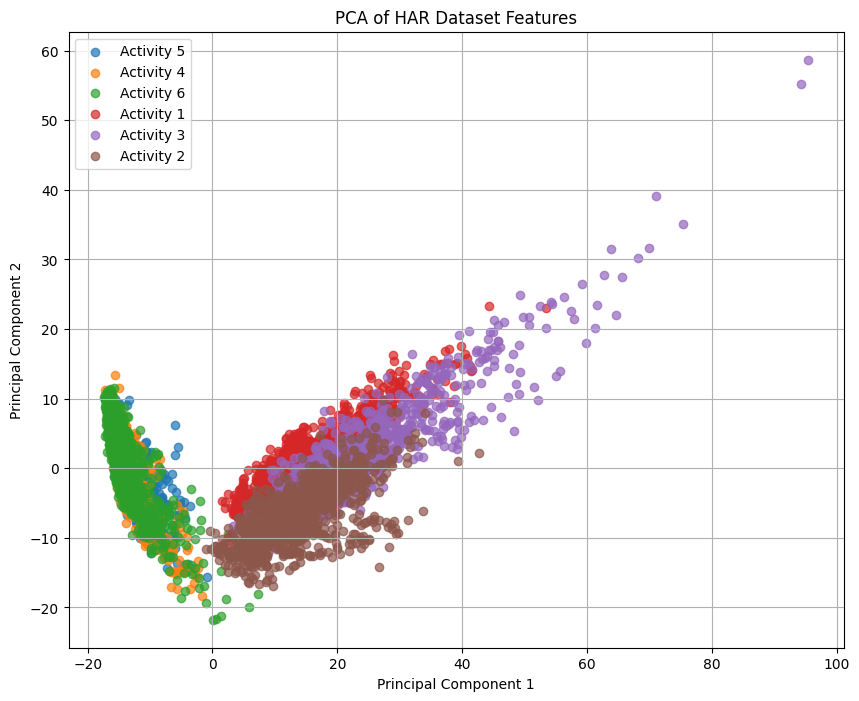

In [21]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x_train_path = "./Data/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt"
y_train_path = "./Data/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt"
features_path = "./Data/UCI HAR Dataset/UCI HAR Dataset/features.txt"

with open(features_path, "r") as f:
    feature_names = [line.strip().split()[1] for line in f.readlines()]  

with open(x_train_path, "r") as x_file:
    x_content = x_file.readlines()

with open(y_train_path, "r") as y_file:
    y_content = y_file.readlines()

data_with_labels = []

for x_line, y_line in zip(x_content, y_content):
    features = [float(value) for value in x_line.split()]
    activity_label = int(y_line.strip())
    data_with_labels.append(features + [activity_label])  # Combine features and label

df = pd.DataFrame(data_with_labels, columns=feature_names + ['Activity'])

X = df.drop(columns=['Activity'])
y = df['Activity']

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Activity'] = y.values

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

for activity in pca_df['Activity'].unique():
    subset = pca_df[pca_df['Activity'] == activity]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Activity {activity}', alpha=0.7)

plt.title('PCA of HAR Dataset Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


### PCA on Tsfel provided the best results since the distinction between the static and dynamic activities was clearly visible. PCA on raw data did not show any insightful results. PCA on dataset features was better than raw data.

# Q4

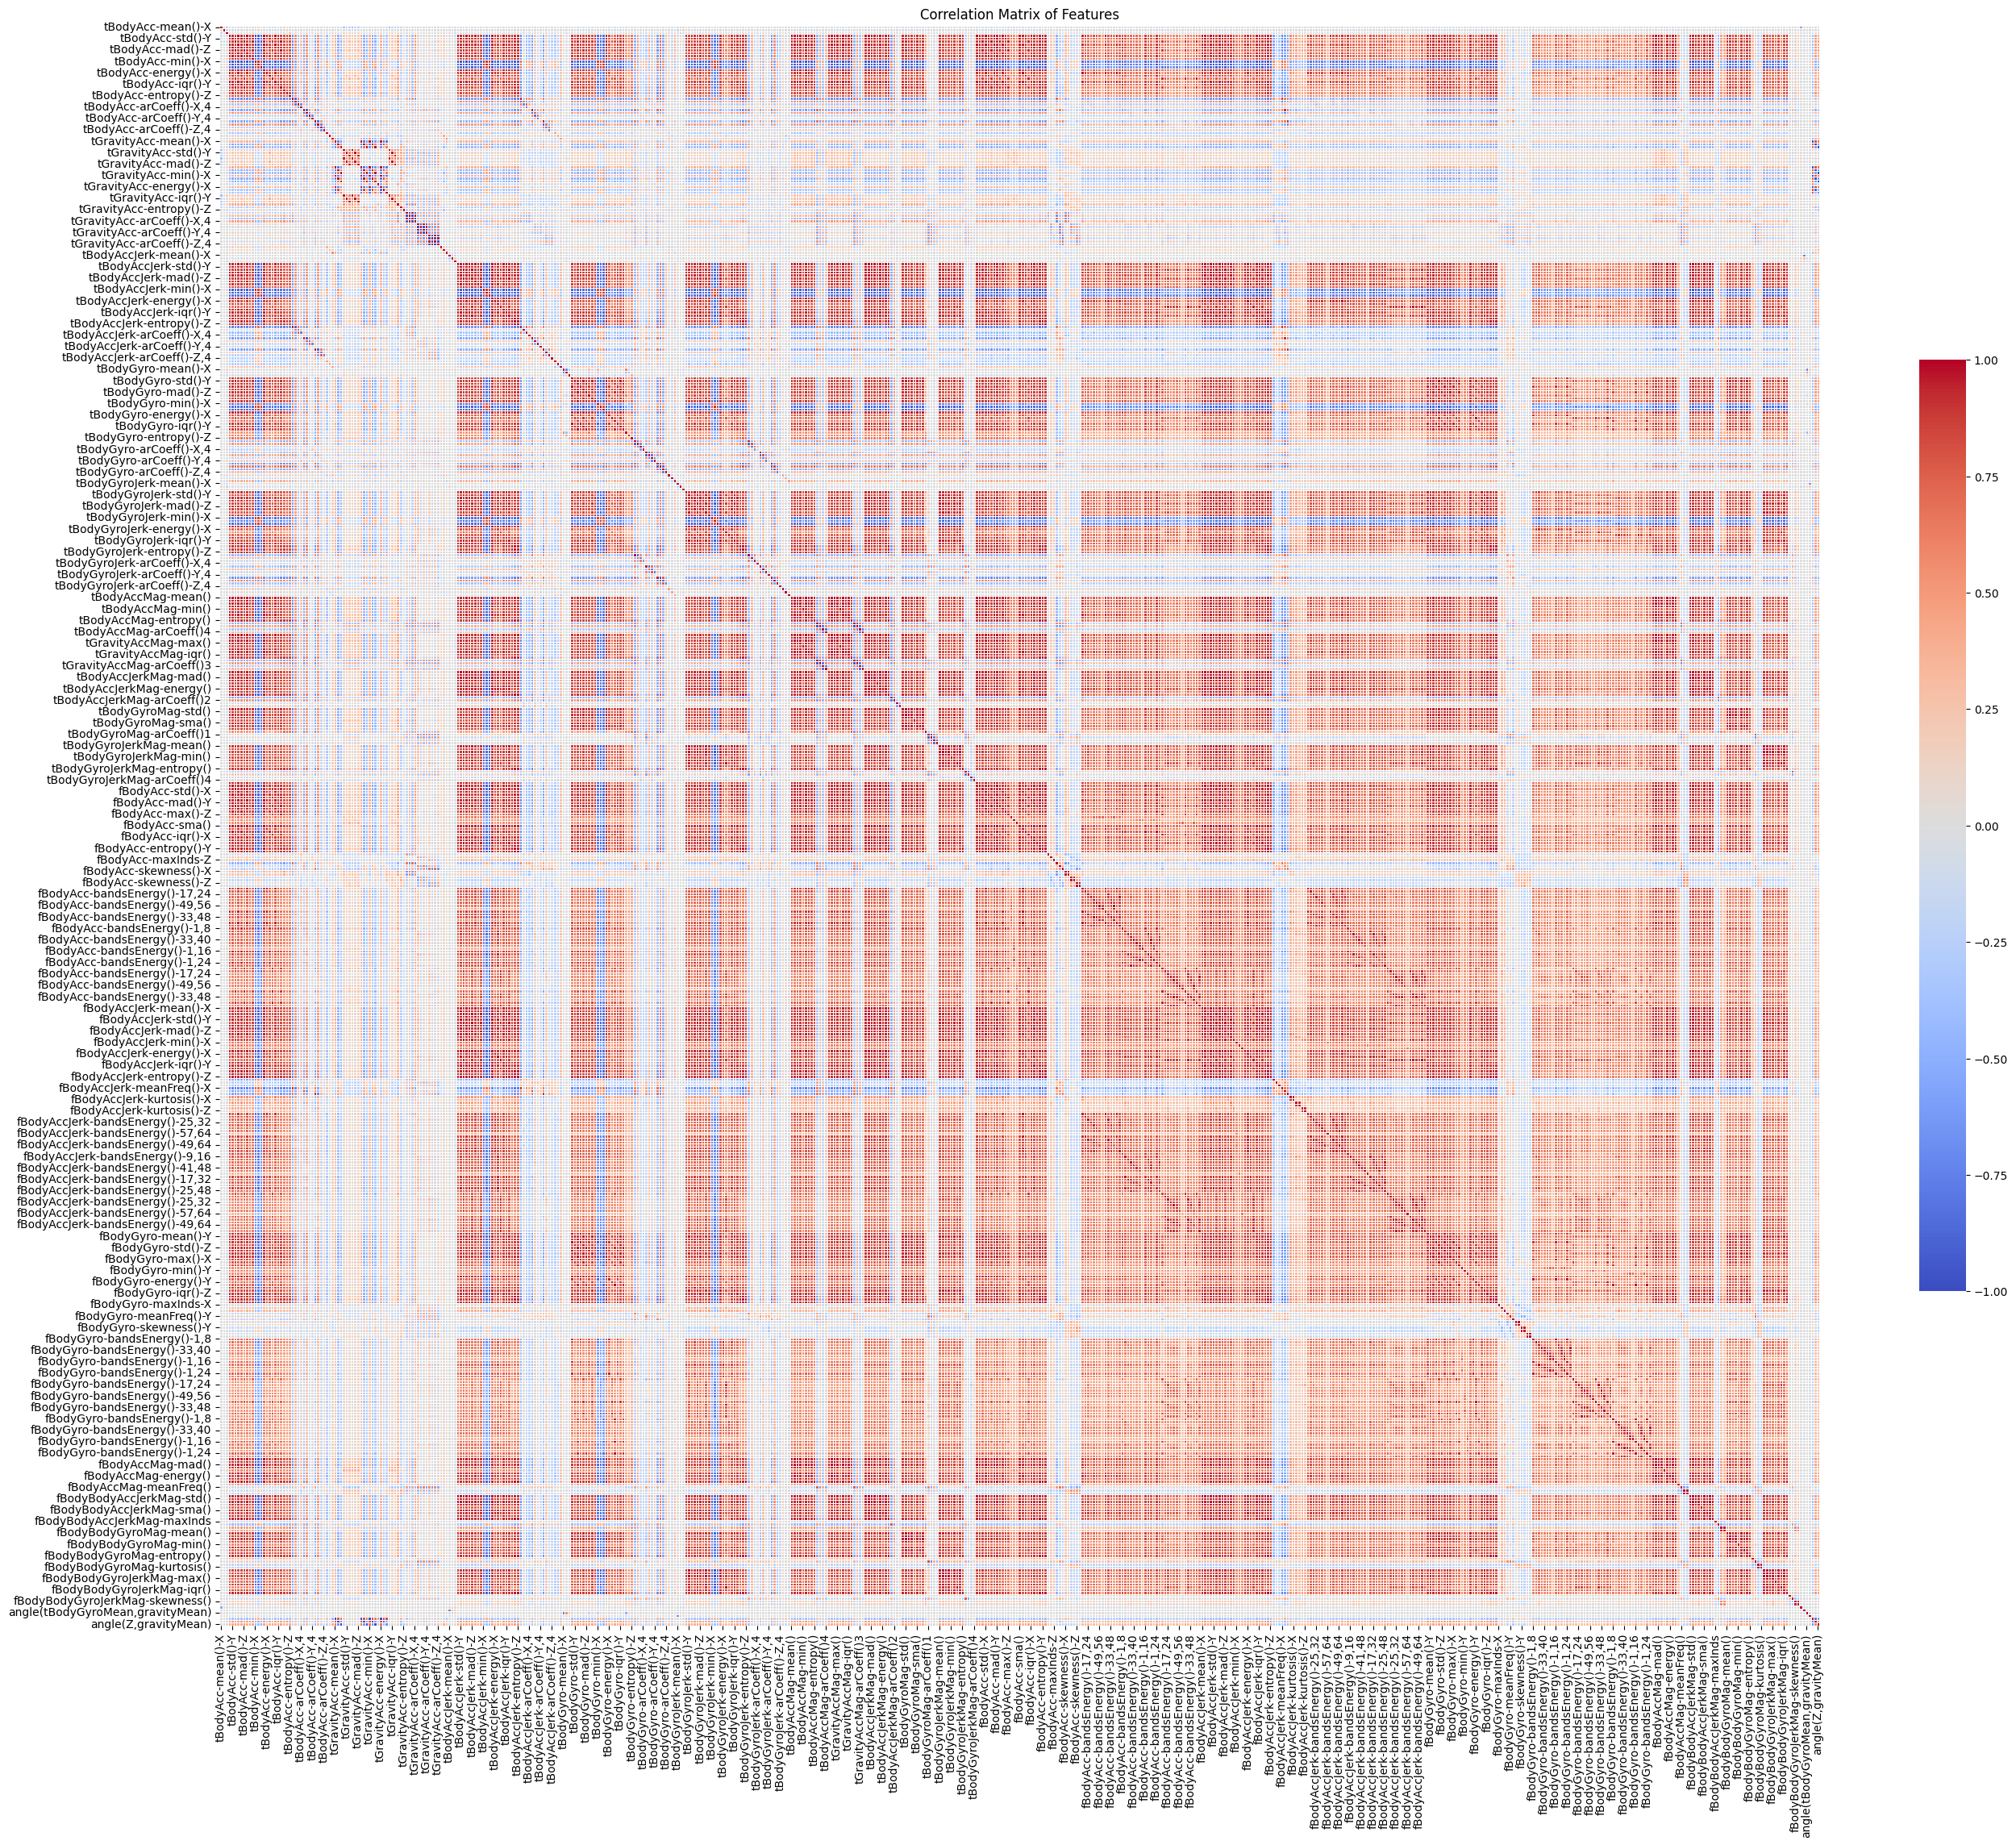

Highly correlated features: tBodyAcc-mad()-X and tBodyAcc-std()-X
Highly correlated features: tBodyAcc-mad()-Y and tBodyAcc-std()-Y
Highly correlated features: tBodyAcc-mad()-Z and tBodyAcc-std()-Z
Highly correlated features: tBodyAcc-max()-X and tBodyAcc-std()-X
Highly correlated features: tBodyAcc-max()-X and tBodyAcc-mad()-X
Highly correlated features: tBodyAcc-max()-Y and tBodyAcc-std()-Y
Highly correlated features: tBodyAcc-min()-X and tBodyAcc-std()-X
Highly correlated features: tBodyAcc-min()-X and tBodyAcc-mad()-X
Highly correlated features: tBodyAcc-min()-Y and tBodyAcc-std()-Y
Highly correlated features: tBodyAcc-sma() and tBodyAcc-std()-X
Highly correlated features: tBodyAcc-sma() and tBodyAcc-std()-Y
Highly correlated features: tBodyAcc-sma() and tBodyAcc-mad()-X
Highly correlated features: tBodyAcc-sma() and tBodyAcc-mad()-Y
Highly correlated features: tBodyAcc-sma() and tBodyAcc-max()-X
Highly correlated features: tBodyAcc-sma() and tBodyAcc-min()-X
Highly correlated feat

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Paths to your files
x_train_path = "./Data/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt"
y_train_path = "./Data/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt"
features_path = "./Data/UCI HAR Dataset/UCI HAR Dataset/features.txt"

# Step 1: Load the feature names
with open(features_path, "r") as f:
    feature_names = [line.strip().split()[1] for line in f.readlines()]

# Step 2: Load the features and activity labels
with open(x_train_path, "r") as x_file:
    x_content = x_file.readlines()

with open(y_train_path, "r") as y_file:
    y_content = y_file.readlines()

# Initialize lists to store data
data_with_labels = []

for x_line, y_line in zip(x_content, y_content):
    features = [float(value) for value in x_line.split()]
    activity_label = int(y_line.strip())
    data_with_labels.append(features + [activity_label])

# Convert to a DataFrame
df = pd.DataFrame(data_with_labels, columns=feature_names + ['Activity'])

# Step 3: Compute the correlation matrix
correlation_matrix = df.iloc[:, :-1].corr()  # Exclude the 'Activity' column

# Step 4: Visualize the correlation matrix
plt.figure(figsize=(32, 30))
sns.heatmap(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1, center=0, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Features')
plt.show()

threshold = 0.95  # Adjust this threshold based on your requirement
highly_correlated = (correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1.0)
for i in range(len(highly_correlated.columns)):
    for j in range(i):
        if highly_correlated.iloc[i, j]:
            print(f'Highly correlated features: {correlation_matrix.columns[i]} and {correlation_matrix.columns[j]}')

#### Features that are highly correlated are red/blue. These features are redundant

# Task 2

## Q1

Accuracy: 0.6111
Precision: 0.5611
Recall: 0.6111


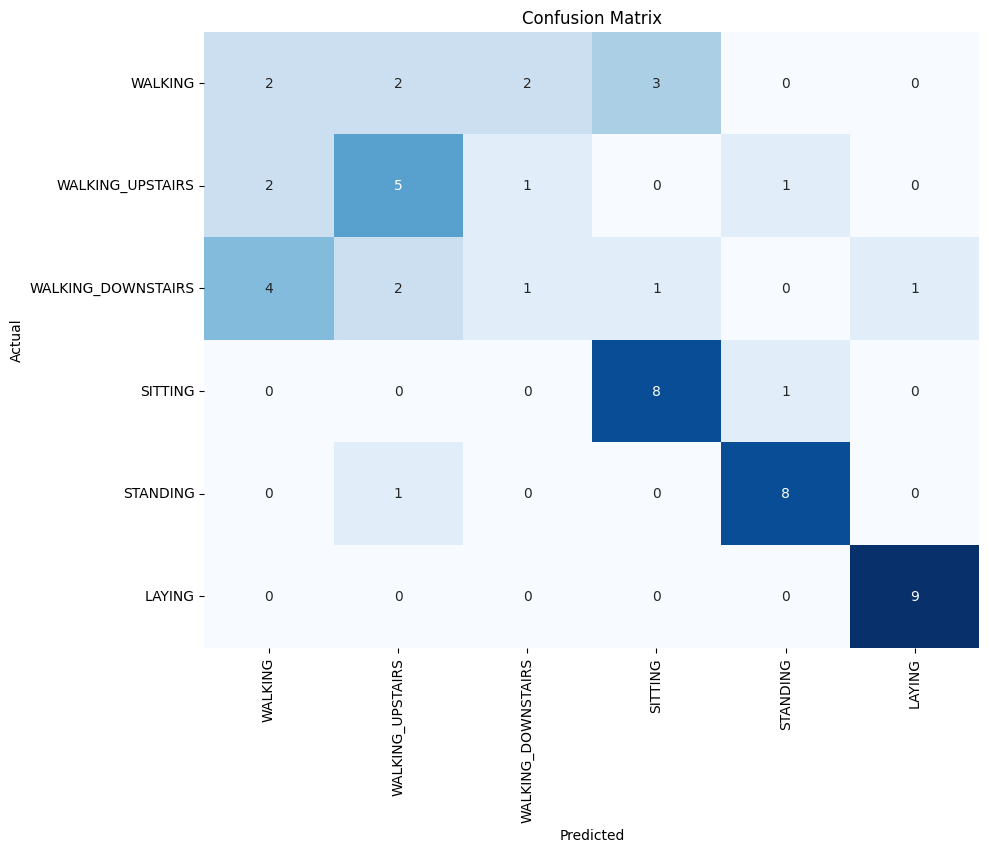

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=10)

X_train_reshaped = X_train.reshape((X_train.shape[0], -1))
X_test_reshaped = X_test.reshape((X_test.shape[0], -1))

dt_classifier.fit(X_train_reshaped, y_train)

y_pred = dt_classifier.predict(X_test_reshaped)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=activities, yticklabels=activities)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [14]:
train_path = "./HAR/Combined/Train"
test_path = "./HAR/Combined/Test"


Accuracy: 0.9433
Precision: 0.9435
Recall: 0.9433
Confusion Matrix:


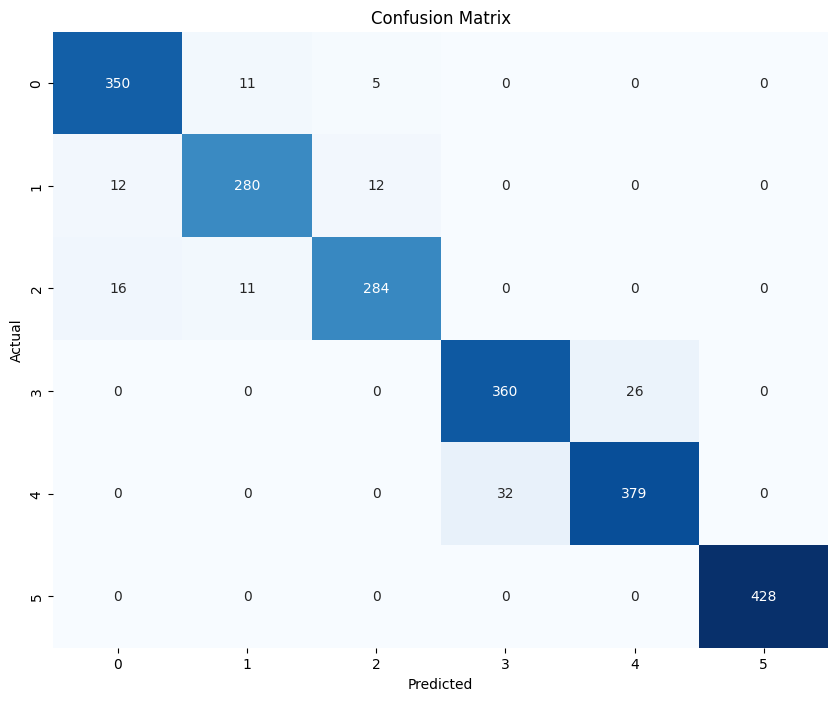

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Paths to your files
x_train_path = "./Data/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt"
y_train_path = "./Data/UCI HAR Dataset/UCI HAR Dataset/train/Y_train.txt"
features_path = "./Data/UCI HAR Dataset/UCI HAR Dataset/features.txt"

# Load the feature names
with open(features_path, "r") as f:
    feature_names = [line.strip().split()[1] for line in f.readlines()]  # Assuming feature names are in the 2nd column

# Load the features and activity labels
with open(x_train_path, "r") as x_file:
    x_content = x_file.readlines()

with open(y_train_path, "r") as y_file:
    y_content = y_file.readlines()

# Initialize lists to store data
data_with_labels = []

for x_line, y_line in zip(x_content, y_content):
    features = [float(value) for value in x_line.split()]
    activity_label = int(y_line.strip())
    data_with_labels.append(features + [activity_label])  # Combine features and label

df = pd.DataFrame(data_with_labels, columns=feature_names + ['Activity'])

X = df.drop(columns=['Activity'])
y = df['Activity']

X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training, 30% testing

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_feat, y_train_feat)

# Make predictions
y_pred_feat = clf.predict(X_test_feat)

# Evaluate the model
accuracy = accuracy_score(y_test_feat, y_pred_feat)
precision = precision_score(y_test_feat, y_pred_feat, average='weighted')
recall = recall_score(y_test_feat, y_pred_feat, average='weighted')
conf_matrix = confusion_matrix(y_test_feat, y_pred_feat)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Q2

Depth: 2, Test Accuracy: 0.4259
Depth: 3, Test Accuracy: 0.5370
Depth: 4, Test Accuracy: 0.5926
Depth: 5, Test Accuracy: 0.5926
Depth: 6, Test Accuracy: 0.6481
Depth: 7, Test Accuracy: 0.5741
Depth: 8, Test Accuracy: 0.6111


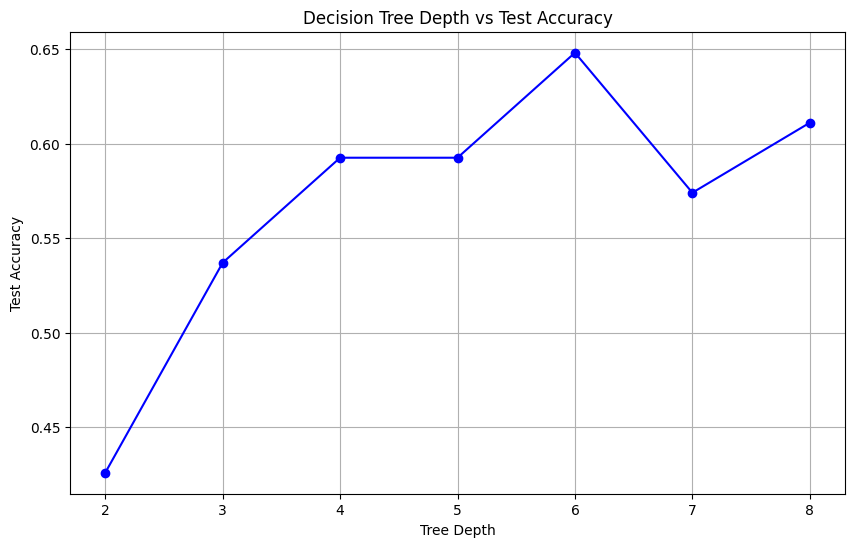

In [19]:
depths = range(2, 9)  # Tree depths from 2 to 8
test_accuracies = []

X_train_reshaped = X_train.reshape((X_train.shape[0], -1))
X_test_reshaped = X_test.reshape((X_test.shape[0], -1))

# Train Decision Tree with varying depths
for depth in depths:
    
    dt_classifier = DecisionTreeClassifier(random_state=42 , max_depth=depth)
    
    # Train the model
    dt_classifier.fit(X_train_reshaped, y_train)

    # Make predictions
    y_pred = dt_classifier.predict(X_test_reshaped)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    test_accuracies.append(accuracy)
    
    print(f"Depth: {depth}, Test Accuracy: {accuracy:.4f}")

# Plot accuracy vs depth
plt.figure(figsize=(10, 6))
plt.plot(depths, test_accuracies, marker='o', linestyle='-', color='b')
plt.title('Decision Tree Depth vs Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()


Depth: 2, Test Accuracy: 0.5462
Depth: 3, Test Accuracy: 0.7874
Depth: 4, Test Accuracy: 0.8867
Depth: 5, Test Accuracy: 0.8998
Depth: 6, Test Accuracy: 0.9316
Depth: 7, Test Accuracy: 0.9343
Depth: 8, Test Accuracy: 0.9402


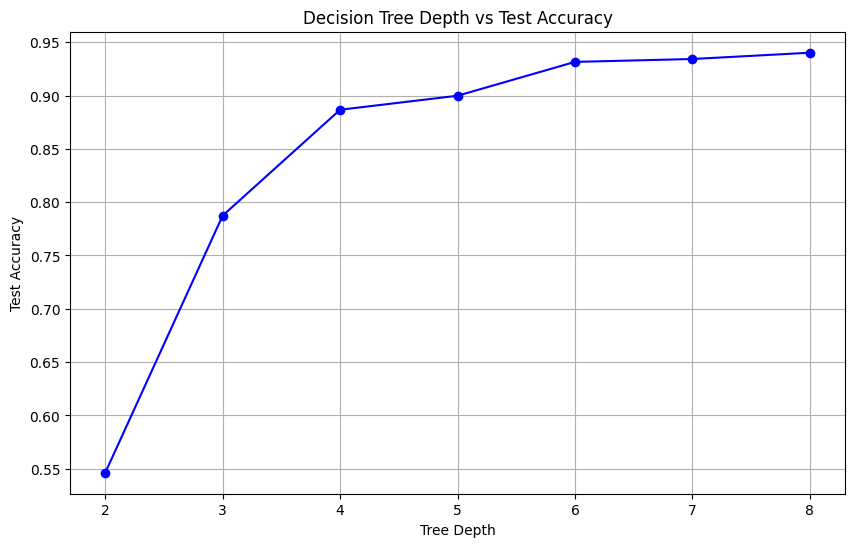

In [20]:
depths = range(2, 9)  # Tree depths from 2 to 8
test_accuracies = []

# Train Decision Tree with varying depths
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train_feat, y_train_feat)
    
    # Predict on test data
    y_pred_feat = clf.predict(X_test_feat)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test_feat, y_pred_feat)
    test_accuracies.append(accuracy)
    
    print(f"Depth: {depth}, Test Accuracy: {accuracy:.4f}")

# Plot accuracy vs depth
plt.figure(figsize=(10, 6))
plt.plot(depths, test_accuracies, marker='o', linestyle='-', color='b')
plt.title('Decision Tree Depth vs Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()


### Walking downstairs was wrongly predicted many times. This can be seen in the confusion matrix of the raw acc.